# How has the mainstream media's covrage changed of Covid-19 during the pandemic?
- ### Can an overall change in sentiment be seen?
- ### Has the topics changed over time?
- ### Can a change in positivity og negativity within publishers be seen?

In [6]:
# Retrieves the dataset from https://www.kaggle.com/jannalipenkova/covid19-public-media-dataset
!kaggle datasets download -d jannalipenkova/covid19-public-media-dataset

covid19-public-media-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile

# Creates a ZipFile Object and loads the dataset into it
with ZipFile('covid19-public-media-dataset.zip', 'r') as zipObj:
    # Extracts all the contents of the zip file in the current directory
    zipObj.extractall('datasets')

In [110]:
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.read_csv('datasets/covid19_articles_20200504.csv', index_col=0)

data_df

,title,date,domain,url,author,content,topic_area
0,My experience of surviving cancer twice,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,"“Helen, I’m so sorry to tell you that you have stage 4 ovarian cancer.” I will never forget hearing those words. Cancer treatment was pretty gruel...",healthcare
1,Ginger: Health benefits and dietary tips,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/265990.php,Jenna Fletcher,"If you buy something through a link on this page, we may earn a small commission. How this works. People have used ginger in cooking and medicine ...",healthcare
2,China pneumonia outbreak may be caused by Sars-type virus: WHO | Science | The Guardian,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/09/china-pneumonia-outbreak-may-be-caused-by-sars-type-virus-who,Reuters,A cluster of more than 50 pneumonia cases in the central Chinese city of Wuhan may be due to a newly emerging member of the family of viruses that...,general
3,New virus identified as likely cause of mystery illness in China,2020-01-08,nature,https://www.nature.com/articles/d41586-020-00020-9,nature,Passengers arriving at Hong Kong's international airport are being monitored for signs a mystery illness that emerged in central China. Credit: An...,science
4,China's Sars-like illness worries health experts | World news | The Guardian,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/chinas-sars-like-illness-worries-health-experts,https://www.theguardian.com/profile/sarahboseley,"The finding that the outbreak of viral pneumonia in China that has struck 59 people may be caused by a coronavirus, the family of viruses behind S...",general
...,...,...,...,...,...,...,...
55532,'It was only advice' Dr Hilary rejects blanket elderly lockdown as he issues stark warning | TV & Radio | Showbiz & TV | Express.co.uk,2020-05-04,express,https://www.express.co.uk/showbiz/tv-radio/1277406/ITV-GMB-Dr-Hilary-Jones-coronavirus-over-70s-death-rate-COVID-19-latest,Aurora Bosotti,"Good Morning Britain's Dr Hilary Jones said the Government had only ever ""advised"" elderly Britons to self-isolate but conceded no blanket order ...",general
55533,Liverpool star Divock Origi provides update on his future amid Timo Werner transfer talk | Football | Sport | Express.co.uk,2020-05-04,express,https://www.express.co.uk/sport/football/1277408/Liverpool-Divock-Origi-Timo-Werner-transfer-news,Mikael McKenzie,Liverpool forward Divock Origi insists his future lies at Anfield despite talk that Jurgen Klopp is considering a swoop for RB Leipzig star Timo ...,general
55534,New York: US states join forces to buy vital medical equipment | World | News | Express.co.uk,2020-05-04,express,https://www.express.co.uk/news/world/1277388/new-york-us-states-ppe-medical-equipment-coronavirus-latest-donald-trump-news-cuomo,Melanie Kaidan,"The deal was agreed by Connecticut, Delaware, Massachusetts, New Jersey, New York, Pennsylvania and Rhode Island. The adjacent states have also a...",general
55535,Coronavirus US: Millions more make joblessness claims | City & Business | Finance | Express.co.uk,2020-05-04,express,https://www.express.co.uk/finance/city/1277374/jobs-unemployment-lockdown-claims-us-coronavirus,Dylan Donnelly,Businesses around the world have seen major losses and redundancies amid the pandemic’s mass shut down of public life. Figures released this week...,general


In [111]:
# Apply first round of text cleaning
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [112]:
data_clean = pd.DataFrame(data_df.content.apply(round1))
data_clean

,content
0,“helen i’m so sorry to tell you that you have stage ovarian cancer” i will never forget hearing those words cancer treatment was pretty grueling ...
1,if you buy something through a link on this page we may earn a small commission how this works people have used ginger in cooking and medicine sin...
2,a cluster of more than pneumonia cases in the central chinese city of wuhan may be due to a newly emerging member of the family of viruses that c...
3,passengers arriving at hong kongs international airport are being monitored for signs a mystery illness that emerged in central china credit andy ...
4,the finding that the outbreak of viral pneumonia in china that has struck people may be caused by a coronavirus the family of viruses behind sars...
...,...
55532,good morning britains dr hilary jones said the government had only ever advised elderly britons to selfisolate but conceded no blanket order was ...
55533,liverpool forward divock origi insists his future lies at anfield despite talk that jurgen klopp is considering a swoop for rb leipzig star timo ...
55534,the deal was agreed by connecticut delaware massachusetts new jersey new york pennsylvania and rhode island the adjacent states have also agreed ...
55535,businesses around the world have seen major losses and redundancies amid the pandemic’s mass shut down of public life figures released this week ...


In [113]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [114]:
data_clean = pd.DataFrame(data_clean.content.apply(round2))
data_clean

,content
0,helen im so sorry to tell you that you have stage ovarian cancer i will never forget hearing those words cancer treatment was pretty grueling in ...
1,if you buy something through a link on this page we may earn a small commission how this works people have used ginger in cooking and medicine sin...
2,a cluster of more than pneumonia cases in the central chinese city of wuhan may be due to a newly emerging member of the family of viruses that c...
3,passengers arriving at hong kongs international airport are being monitored for signs a mystery illness that emerged in central china credit andy ...
4,the finding that the outbreak of viral pneumonia in china that has struck people may be caused by a coronavirus the family of viruses behind sars...
...,...
55532,good morning britains dr hilary jones said the government had only ever advised elderly britons to selfisolate but conceded no blanket order was ...
55533,liverpool forward divock origi insists his future lies at anfield despite talk that jurgen klopp is considering a swoop for rb leipzig star timo ...
55534,the deal was agreed by connecticut delaware massachusetts new jersey new york pennsylvania and rhode island the adjacent states have also agreed ...
55535,businesses around the world have seen major losses and redundancies amid the pandemics mass shut down of public life figures released this week s...


In [115]:
import nltk, re

def clean_text_round3(text):
    
    covid_reg = re.compile(r'.*corona.*|.*covid.*', re.IGNORECASE)
    
    while True:
        try:
            words = set(nltk.corpus.words.words())
        except:
            nltk.download('words')
        break

    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
             if w.lower() in words or covid_reg.match(w))

round3 = lambda x: clean_text_round3(x)

In [ ]:
data_clean = pd.DataFrame(data_clean.content.apply(round3))
data_clean.to_pickle('data_clean_r3.pkl')

In [26]:
data_clean = pd.read_pickle('data_clean_r3.pkl')

In [28]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aal,aam,aba,aback,abacus,abalone,abandon,abandoned,abandonment,...,zoology,zoom,zoonosis,zoonotic,zorro,zoster,zowie,zucchini,zwanziger,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_dtm = data_dtm.transpose()

In [30]:
# Find the top 30 words mentioned in each article
top_dict = {}
for c in data_dtm.iloc[:0].columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('cancer', 15),
  ('time', 6),
  ('didnt', 5),
  ('life', 5),
  ('like', 5),
  ('second', 4),
  ('recovery', 4),
  ('story', 4),
  ('round', 4),
  ('doctor', 4),
  ('treatment', 4),
  ('lot', 4),
  ('continued', 4),
  ('feeling', 3),
  ('surgeon', 3),
  ('live', 3),
  ('surgery', 3),
  ('received', 3),
  ('diagnosis', 3),
  ('just', 3),
  ('longer', 3),
  ('told', 3),
  ('tell', 3),
  ('days', 3),
  ('knew', 3),
  ('thought', 3),
  ('god', 3),
  ('woke', 2),
  ('easy', 2),
  ('mother', 2)],
 1: [('ginger', 40),
  ('health', 9),
  ('nausea', 8),
  ('help', 8),
  ('research', 7),
  ('included', 6),
  ('effects', 6),
  ('extract', 6),
  ('learn', 5),
  ('reduce', 5),
  ('used', 5),
  ('small', 5),
  ('medicine', 4),
  ('does', 4),
  ('inflammation', 4),
  ('people', 4),
  ('free', 4),
  ('pain', 4),
  ('body', 4),
  ('supplement', 4),
  ('safe', 4),
  ('dried', 3),
  ('risk', 3),
  ('digestion', 3),
  ('diet', 3),
  ('cancer', 3),
  ('taking', 3),
  ('relieve', 3),
  ('remedy', 3),
 

In [34]:
top_words_top_30 = {}
for k,v in top_dict.items():
    for word_count in v:
        key = word_count[0]
        value = word_count[1]
        if key not in top_words_top_30:
            top_words_top_30[key] = value
        else:
            top_words_top_30[key] += value
            
word_count = {k: v for k, v in sorted(top_words_top_30.items(), key=lambda item: item[1], reverse=True)}

In [77]:
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", max_words=200)
cloud.fit_words(top_words_top_30)
cloud.to_file("word_cloud.png")

![Top 30 Words](word_cloud.png)

In [69]:
data_dtm_top_30 = data_dtm.transpose()[list(word_count)[:30]]

data_dtm_top_30_date = data_dtm_top_30.join(data_df.date)

data_dtm_top_30_date = data_dtm_top_30_date.groupby('date', as_index=False, sort=False).sum()

In [84]:
data_dtm_top_30_date.head()

,date,said,people,new,health,virus,government,time,china,company,...,market,march,global,work,crisis,financial,need,business,trump,day
0,2020-01-03,2,5,0,10,1,0,7,0,0,...,0,0,0,1,0,0,2,0,0,3
1,2020-01-08,5,12,2,8,8,2,1,3,0,...,1,0,0,1,0,0,0,0,0,1
2,2020-01-09,7,24,2,21,2,0,2,6,0,...,1,0,5,4,0,0,16,0,0,12
3,2020-01-10,4,2,3,5,2,0,0,3,0,...,0,0,4,0,0,0,2,1,0,0
4,2020-01-11,0,14,0,5,0,0,2,0,0,...,0,0,0,2,0,0,1,0,0,0


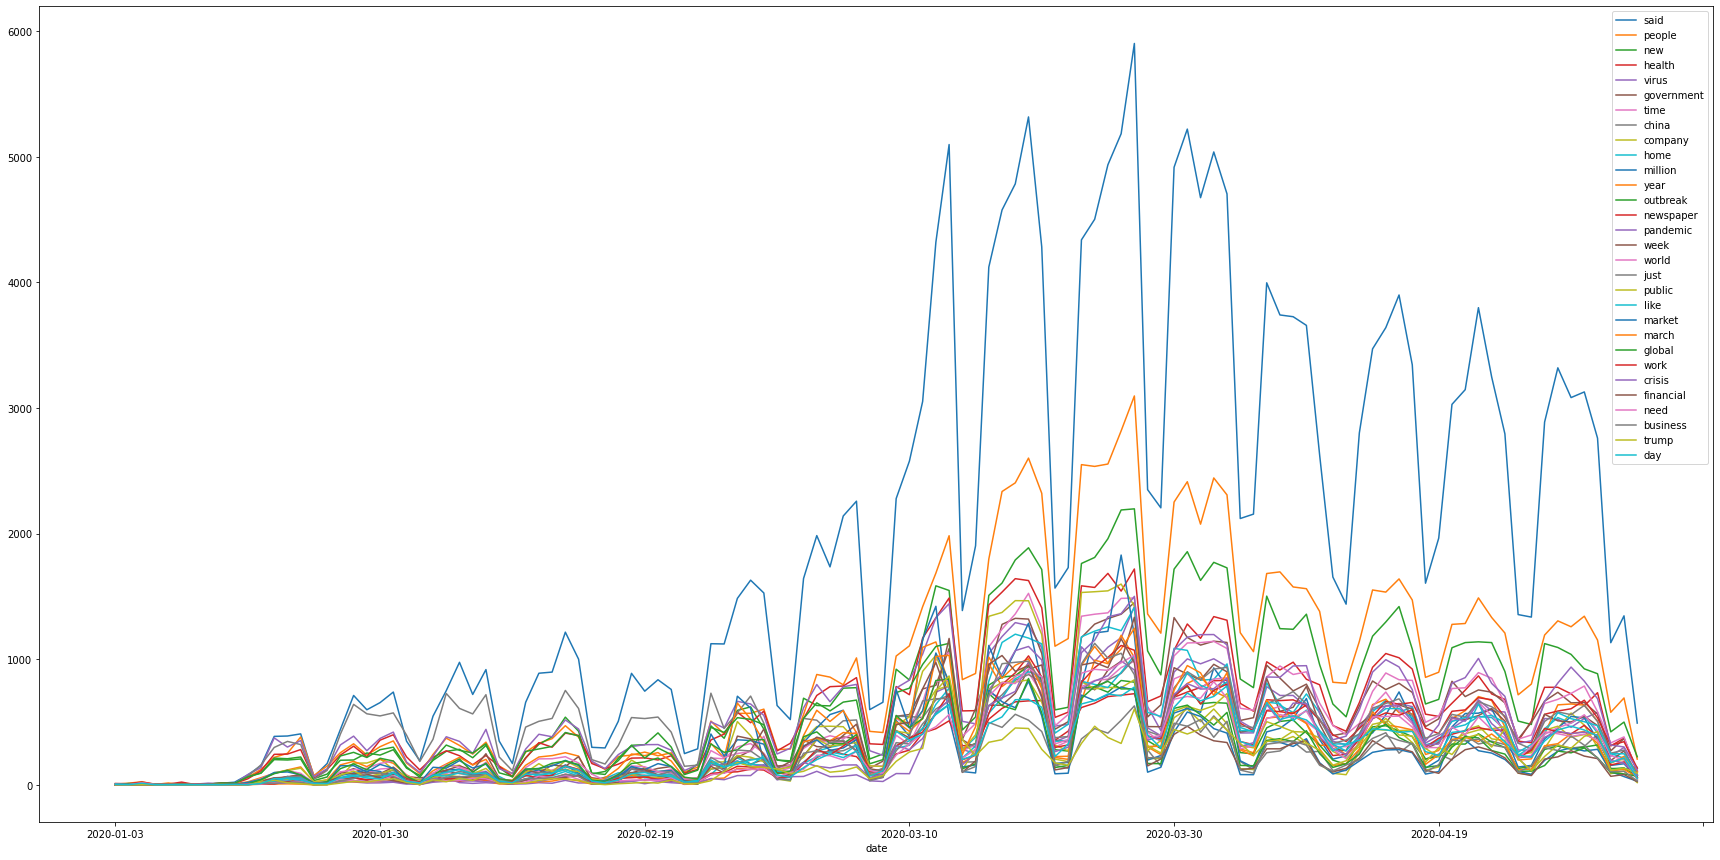

In [92]:
import matplotlib.pyplot as plt
    
data_dtm_top_30_date.plot(kind='line',x='date', figsize=(30,15))

plt.show()